# Lending club dataset to gain insights on which type of loans have a higher risk of defaulting - EDA 

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

### Due to huge no of columns and rows, setting defaults to view all data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

### Loading dataset

In [5]:
loans = pd.read_csv("loan.csv", low_memory = False)

### Viewing the rows, columns and datatypes for better understanding

In [7]:
loans.info(max_cols=120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleaning

### Checking the columns with null values 

In [9]:
loans.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### There are many columns with the maximum number of null values. These should be removed because they provide no value to the analysis.

In [11]:
loan01=loans[loans.columns[~(loans.isnull().sum()>35000)]].copy()

### Rechecking null values

In [13]:
loan01.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Identify Missing values for remaining coloumns

### mths_since_last_delinq has maximum null values. Drawing the box plot to find if thier any outliners.


<Axes: >

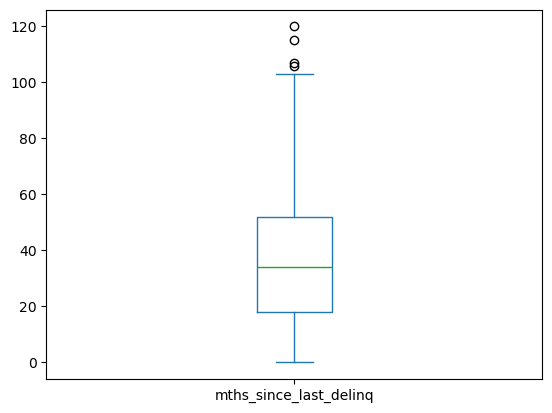

In [15]:
loan01.mths_since_last_delinq.plot.box()

### There are outliers above 100 hence veiwing the data distribution for values below 100. Checking the spread of data below 100


In [17]:
loan01[loan01['mths_since_last_delinq'] <= 100]['mths_since_last_delinq'].describe()

count    14029.000000
mean        35.869698
std         21.972408
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max         97.000000
Name: mths_since_last_delinq, dtype: float64

In [19]:
# Since 75% of the data seems to be clustered below 52 hence taking the median to fill up the null values 
fill_mths = loan01[loan01['mths_since_last_delinq'] <= 100]['mths_since_last_delinq'].median()

In [21]:
loan01.mths_since_last_delinq.fillna(fill_mths,inplace=True)

In [23]:
loan01.mths_since_last_delinq.isnull().sum()

0

### desc column has more than 12000 null values. As we have purpose column to identify the desc, dropping the desc column

In [25]:
loan01.desc.fillna('drop')
loan01.drop('desc', axis=1, inplace= True)

### emp_title has more than 2000 null values. Replaceing missing values with title "Others"

In [27]:
loan01.emp_title.fillna('Others', inplace = True)

In [29]:
# recheck emp_title colum still has any null value 
loan01.emp_title.isnull().sum()

0

### emp_length has more than 1000 null values. Removing all nan values

In [31]:
loan01=loan01[~loan01['emp_length'].isnull()]

### pub_rec_bankruptcies column has more than 600 null values. Since value of this column represent the number of publickly known bankruptcies, we will assume Null values to represent no known bankruptcies recorded and filling it with 0.0

In [33]:
loan01.pub_rec_bankruptcies.fillna(0.0, inplace = True)

### For the null values in last_pymnt_d column, we assumed May 2016 to be the latest date when the report was generated and imputed the data by subtracting the number of months in the "mths_since_last_delinq" column for respective values and subtracting it from May 2016

In [35]:
#Converting last_pymnt_d column to datetime series
loan01.last_pymnt_d=pd.to_datetime(loan01['last_pymnt_d'],format='%b-%y').dt.strftime('%b %Y')
loan01.last_pymnt_d.value_counts()

last_pymnt_d
May 2016    1209
Mar 2013    1001
Dec 2014     911
May 2013     884
Feb 2013     846
Mar 2012     828
Apr 2013     822
Aug 2012     811
Oct 2012     809
Mar 2014     805
Jan 2014     801
Aug 2014     797
Jul 2014     793
Oct 2014     778
Jan 2013     769
Feb 2014     768
Dec 2013     758
Sep 2012     753
Jul 2013     750
Jun 2014     744
Jul 2012     724
Nov 2012     723
Apr 2012     721
Feb 2012     719
May 2012     718
Aug 2013     702
Dec 2012     691
Jun 2012     683
Oct 2013     672
Jun 2013     671
May 2014     659
Sep 2014     658
Sep 2013     655
Apr 2014     653
Nov 2013     646
Nov 2014     560
Jan 2012     534
Dec 2011     528
Mar 2011     475
Nov 2011     441
Sep 2011     440
Oct 2011     438
Aug 2011     423
Apr 2011     411
Jul 2011     385
May 2011     373
Jun 2011     364
Feb 2011     331
Jan 2015     326
Jan 2011     265
Dec 2010     250
Jul 2015     244
Nov 2015     222
Apr 2016     217
Jun 2015     216
Oct 2010     215
Mar 2016     210
Aug 2015     200
S

In [37]:
#Using mths_since_last_delinq column to impute the last payment date by subtracting it from May 2016
loan01.loc[loan01['last_pymnt_d'].isnull(), 'mths_since_last_delinq']

26       34.0
2724     34.0
3613     25.0
3985     34.0
4206     34.0
4803     34.0
5716     34.0
6253      9.0
6259     34.0
6768     34.0
6943     34.0
6967     58.0
7137     64.0
8429     52.0
8707     34.0
10175    34.0
11051    34.0
11468    34.0
11523    34.0
11703    13.0
11860    52.0
12026    35.0
12739    40.0
13661    34.0
13891    34.0
13969    34.0
14220    34.0
14642    16.0
14871    29.0
16301    34.0
16325    34.0
17913     7.0
18037    34.0
18216    34.0
18316    37.0
18332    34.0
22998    34.0
24469    46.0
24779    34.0
24881    34.0
26775    34.0
27644    23.0
28155    34.0
28685    74.0
29635    40.0
30297    13.0
31206    34.0
31359    34.0
32322    34.0
32378    34.0
32593    35.0
32760    10.0
32967    34.0
33567    34.0
34177    34.0
34217    34.0
34237    34.0
34420    34.0
34438    34.0
35143    34.0
35186    21.0
36185    34.0
36206    34.0
36209    34.0
36937    50.0
37911    10.0
Name: mths_since_last_delinq, dtype: float64

In [39]:
#Setting reference date as May 2016 assuming that is when the report was pulled
date_reference = pd.to_datetime("May 2016")

In [41]:
loan01.loc[loan01['last_pymnt_d'].isnull(), 'last_pymnt_d'] = loan01.loc[loan01['last_pymnt_d'].isnull(), 'mths_since_last_delinq'].apply(lambda x: date_reference - pd.DateOffset(months=x))

In [43]:
loan01.last_pymnt_d.isnull().sum()

0

### Dropping the below columns as we dont see much use for them in our analysis for deriving insights on Bad Loans

In [45]:
#Dropping below columns as they dont seem to be contributing much to deriving insights
drop_list=['id','member_id','funded_amnt_inv','url','zip_code',
'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','chargeoff_within_12_mths',
'collections_12_mths_ex_med','tax_liens','last_credit_pull_d']

loan01.drop(columns=drop_list,inplace=True,axis=1)

In [43]:
### Final data after data cleanup

In [47]:
loan01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38642 non-null  int64  
 1   funded_amnt             38642 non-null  int64  
 2   term                    38642 non-null  object 
 3   int_rate                38642 non-null  object 
 4   installment             38642 non-null  float64
 5   grade                   38642 non-null  object 
 6   sub_grade               38642 non-null  object 
 7   emp_title               38642 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          38642 non-null  object 
 10  annual_inc              38642 non-null  float64
 11  verification_status     38642 non-null  object 
 12  issue_d                 38642 non-null  object 
 13  loan_status             38642 non-null  object 
 14  pymnt_plan              38642 non-null  obj

## Data Manipulation 

In [49]:
#analyzing data type in each column
loan01.dtypes

loan_amnt                   int64
funded_amnt                 int64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
pymnt_plan                 object
purpose                    object
title                      object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
initial_list_status        object
out_prncp     

In [51]:
loan01['Month'] = pd.to_datetime(loan01['issue_d'], format='%b-%y').dt.month
loan01['Year'] = pd.to_datetime(loan01['issue_d'], format='%b-%y').dt.year

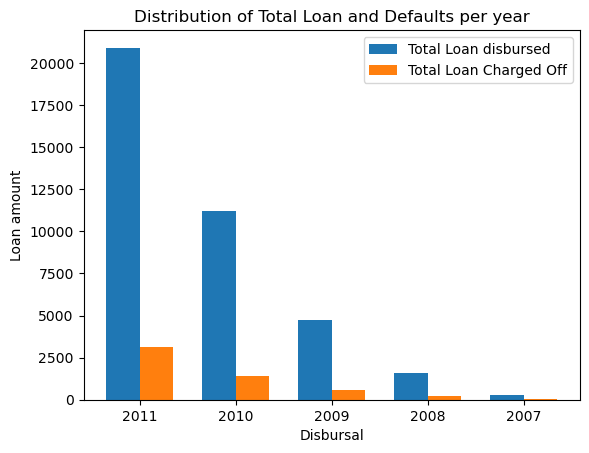

In [55]:
v1=loan01.Year.value_counts()
v2=loan01[loan01['loan_status']=='Charged Off']['Year'].value_counts()
categories = ['2011','2010','2009','2008','2007']
fig, ax = plt.subplots()


x = np.arange(len(categories))
width = 0.35

# Plot the first bar chart
rect1 = ax.bar(x, v1, width, label='Total Loan disbursed')

# Plot the second bar chart with an offset
rect2 = ax.bar(x + width, v2, width, label='Total Loan Charged Off')

# Add labels, title, and legend
ax.set_xlabel('Disbursal')
ax.set_ylabel('Loan amount')
ax.set_title('Distribution of Total Loan and Defaults per year')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.show()

In [54]:
#Removing % from int_rate column
loan01['int_rate'] = loan01.int_rate.str.strip('%').astype(float)

In [56]:
#Removing the % sign and converting to numeric for conducting quantitative analysis
loan01.emp_length=pd.to_numeric(loan01.emp_length.astype(str).str.replace('[^\d.]', '', regex=True))

In [58]:
# Replace infinite values with NaN
loan01.replace([np.inf, -np.inf], np.nan, inplace=True)

In [60]:
# Ensure 'annual_inc' is numeric
loan01['annual_inc'] = pd.to_numeric(loan01['annual_inc'], errors='coerce')
# Replace infinite values with NaN
loan01.replace([np.inf, -np.inf], np.nan, inplace=True)
# Impute NaN values with the mean of the column
loan01['annual_inc'].fillna(loan01['annual_inc'].mean(), inplace=True)


# Replace infinite values with NaN
loan01.replace([np.inf, -np.inf], np.nan, inplace=True)

### Derived Variables

In [62]:
loan01['Month'] = pd.to_datetime(loan01['issue_d'], format='%b-%y').dt.month
loan01['Year'] = pd.to_datetime(loan01['issue_d'], format='%b-%y').dt.year
loan01['loan_status_stat'] = loan01['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

### Bining Continous Variables - to analyse data more efficiently

In [64]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan01['loan_amnt_range'] = pd.cut(loan01['loan_amnt'], bins, labels=bucket_l)
loan01['funded_amnt_range'] = pd.cut(loan01['funded_amnt'], bins, labels=bucket_l)

#create bins for interest rate
bins = [0,7.5,10, 12.5, 15, 30]
bucket_i = ['0-7.5', '7.5-10','10-12.5','12.5-15','15+']
loan01['int_rate_range']  = pd.cut(loan01['int_rate'],bins,bucket_i)

#create bins for annual income
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan01['annual_inc_range'] = pd.cut(loan01['annual_inc'], bins, labels=bucket_l)

# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_d = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan01['dti_range'] = pd.cut(loan01['dti'], bins, labels=bucket_d)

In [66]:
#Since we are interested in patterns that lead to bad loans, removing all Ongoing loans as they will not be of any help here
loan01=loan01[~(loan01.loan_status== 'Current')]

#### As we are done with cleaning the data, derived new variables for our analysis and removed the outliers. Now, we can start analysing the data.

## Univariate Analysis 

### Quantitative Variables

### 1. Analyzing Loan Amount

<Axes: >

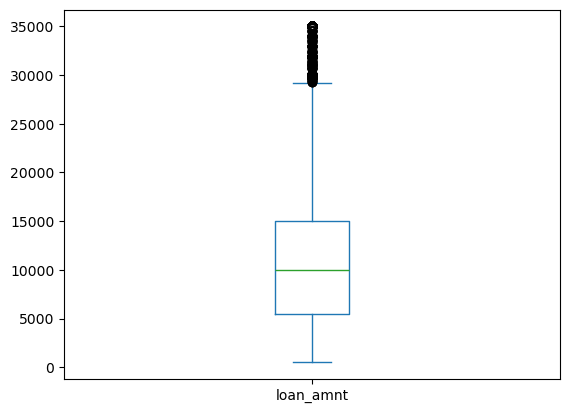

In [68]:
loan01.loan_amnt.plot.box()

### 75% of the Loans are in the range of 15000 and below. Plotting the spread above and below the 75th percentile (15000)

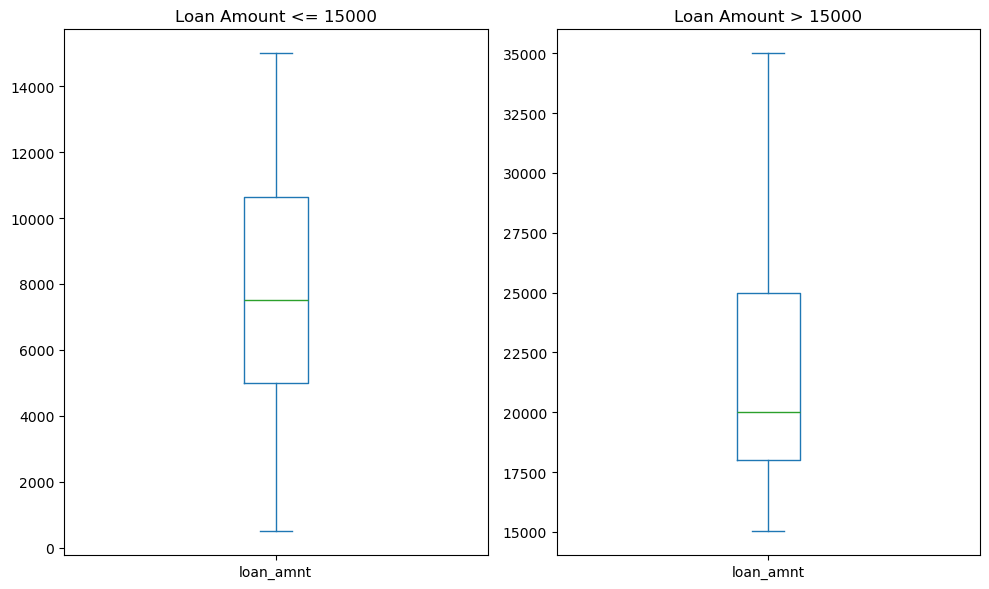

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

loan01[loan01['loan_amnt'] <= 15000]['loan_amnt'].plot.box(ax=axes[0])
axes[0].set_title('Loan Amount <= 15000')

loan01[loan01['loan_amnt'] > 15000]['loan_amnt'].plot.box(ax=axes[1])
axes[1].set_title('Loan Amount > 15000')

plt.tight_layout()
plt.show()

### Observations
#### we can say that most of them have taken their loan between 5000 and 15000.

### 2. Loan amount requested and funded

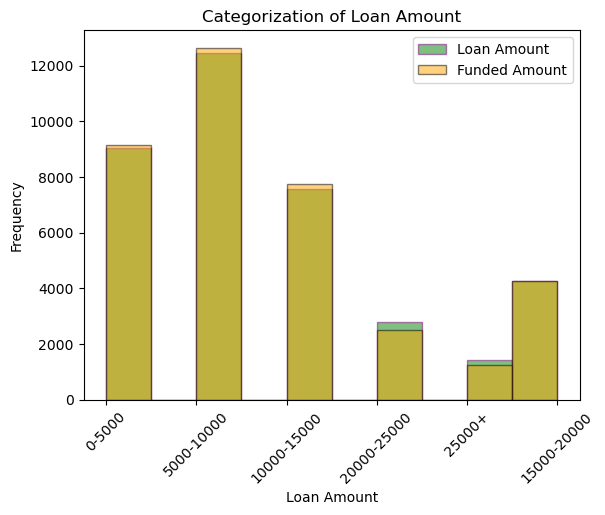

In [72]:
plt.hist(loan01.loan_amnt_range, edgecolor='purple', alpha=0.5,color='green', label='Loan Amount')
plt.hist(loan01.funded_amnt_range, edgecolor='black', alpha=0.5,color='orange', label='Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Categorization of Loan Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Observations

#### We discovered that loan amounts had a very high density around the 20000 mark, with the largest number of loans in the 8000-10000 range. The pattern also indicates that in most situations, the entire loan amount requested was funded. We do see a few examples on the upper end of the loan magnitude spectrum when the funded amount is less than the loan amount.

### 3. Analyzing Interest Rate

C:\Users\nehac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


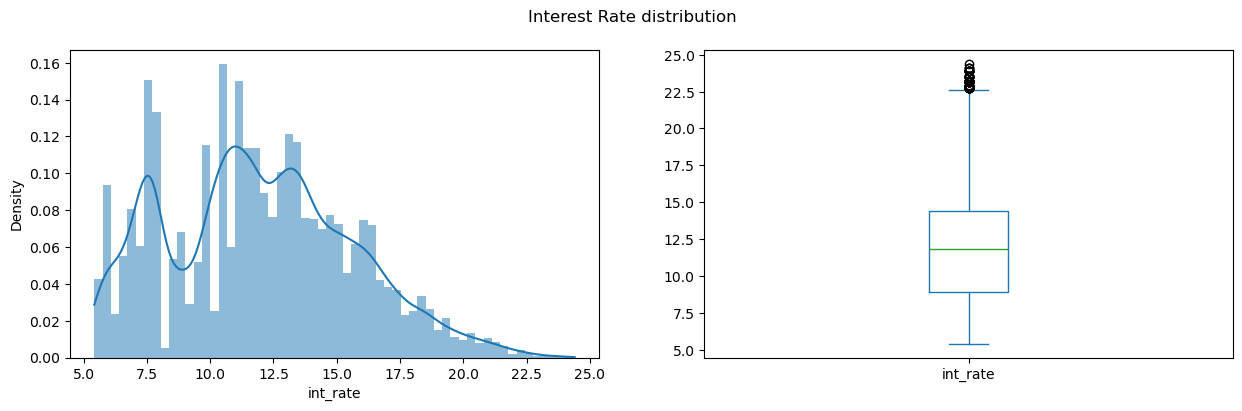

In [74]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#histrogram plot
sns.histplot(loan01.int_rate, label="100% Equities", kde=True, stat="density", linewidth=0)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
loan01.int_rate.plot.box()

#Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

### Observations
#### From interest rate data, we can say that most of the interest rate lies between 9% to 14.5%.

### Unordered Categorical Variables

### Analyzing loan status 

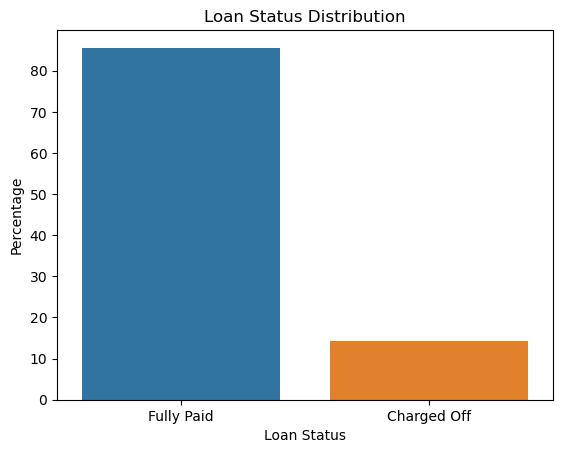

In [76]:
#converting value_count into percentage
# Calculate the loan status distribution
ls = loan01["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()

# Rename the columns for clarity
ls.columns = ['Loan Status', 'Percentage']

# Create the bar plot
sns.barplot(data=ls, x="Loan Status", y="Percentage")
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

### Observations

#### we can say that 85.7% have fully paid whereas 14.3% are charged off.

### Ordered Categorical Variables

### Analyzing loan paying term and loan status for better understanding

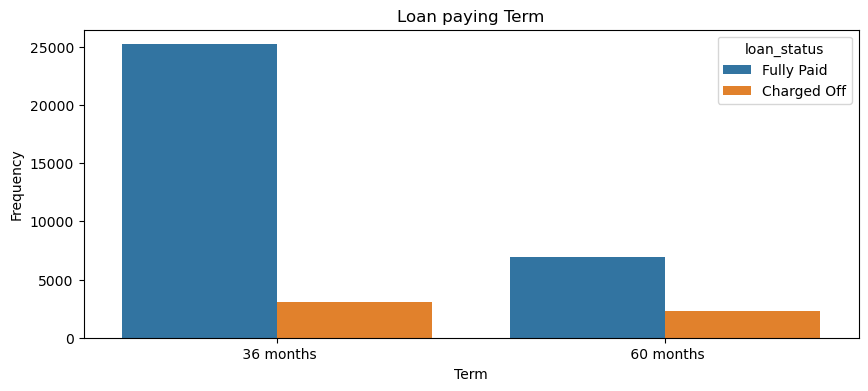

In [80]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=loan01, hue= 'loan_status')
ax.set_title('Loan paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

#### Observations

#### Most of the loan taken for 36 months as compared to 60 months and Charged off loan status is high for 36 months.

### Taking a look at Grade and Sub-Grade and their relation if any to Loan amount or interest rate

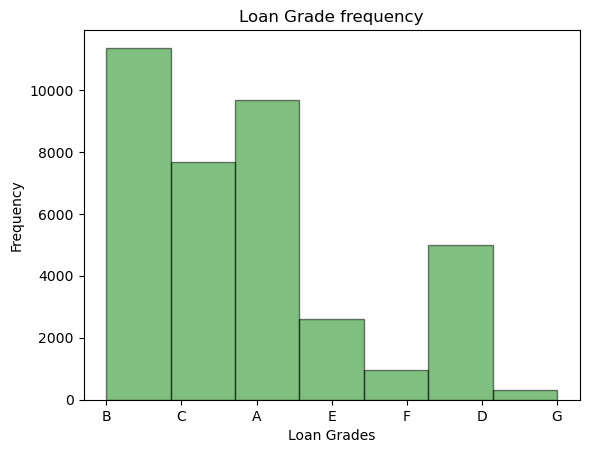

In [135]:
plt.hist(loan01.grade,bins=7,edgecolor='black', alpha=0.5,color='green', label='grade')
plt.xlabel('Loan Grades')
plt.ylabel('Frequency')
plt.title('Loan Grade frequency')
plt.show()

#### Observations
####  Garde B have the highest amount of loan

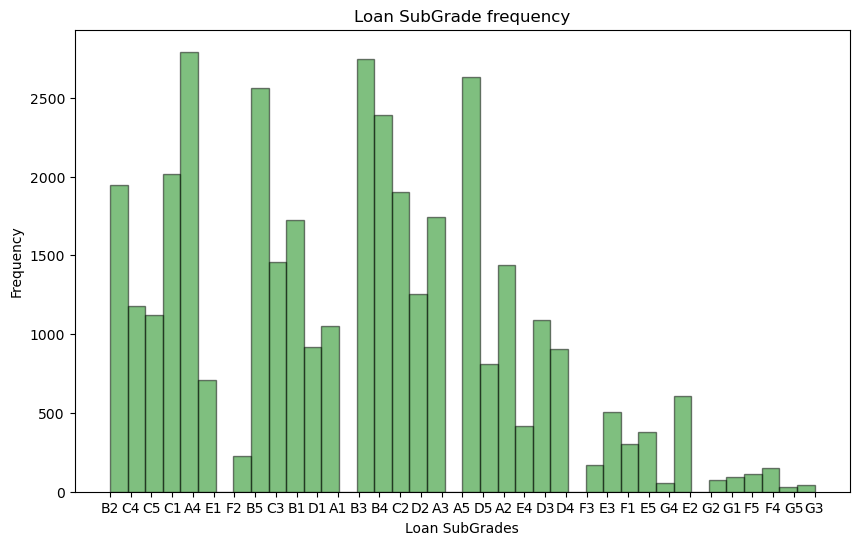

In [139]:
plt.figure(figsize=(10, 6))
plt.hist(loan01.sub_grade,bins=40,edgecolor='black', alpha=0.5,color='green', label='sub-grade')
plt.xlabel('Loan SubGrades')
plt.ylabel('Frequency')
plt.title('Loan SubGrade frequency')
plt.show()

## Segmented Univariate Analysis

C:\Users\nehac\AppData\Local\Temp\ipykernel_9896\1099481395.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan01.groupby('annual_inc_range')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=True)


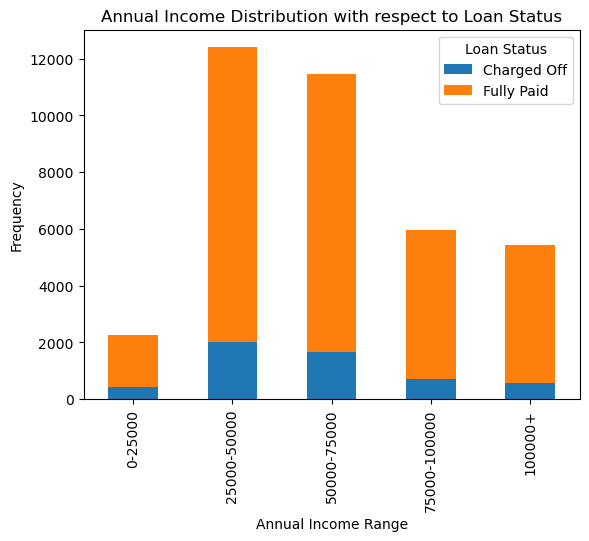

In [82]:
# Studying Anual income and loan status pattern 
colors = ['#1f77b4', '#ff7f0e']
loan01.groupby('annual_inc_range')['loan_status'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Annual Income Distribution with respect to Loan Status")
plt.xlabel("Annual Income Range")
plt.ylabel("Frequency")
plt.legend(title='Loan Status')
plt.show()

#### Observations

#### Most of the borrower's annual income is in range of 25k to 50k    

## Bivariate Analysis

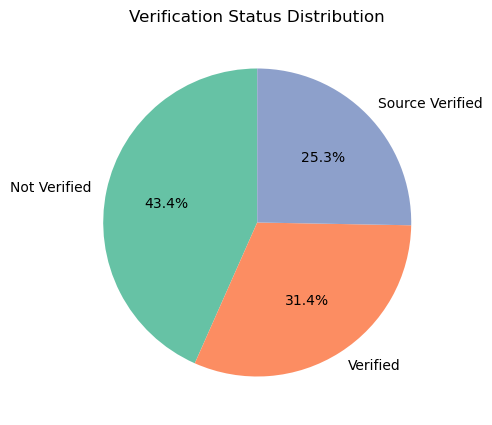

In [84]:
#### Analyzing Verification status and its relation to loan amount , interest rates


plt.figure(figsize=(5, 5))

# Pie chart
loan01['verification_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=90)
plt.ylabel('')
plt.title('Verification Status Distribution')
plt.show()

#### Observations
#### There are a more Not-Verified borrowers than Verified or Source Verified borrowers

#### lets identify if that affects the loan status and intrest rate

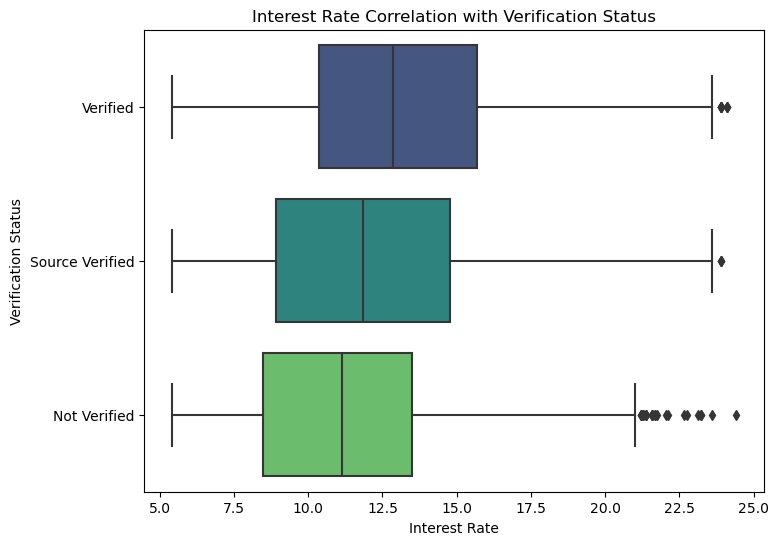

In [86]:
plt.figure(figsize=(8, 6))

# Box plot
sns.boxplot(data=loan01, y='verification_status', x='int_rate', palette='viridis')
plt.ylabel('Verification Status')
plt.xlabel('Interest Rate')
plt.title('Interest Rate Correlation with Verification Status')
plt.show()

#### Observations
#### There is no evidence that Not Verified Borrowers are charged higher interest.

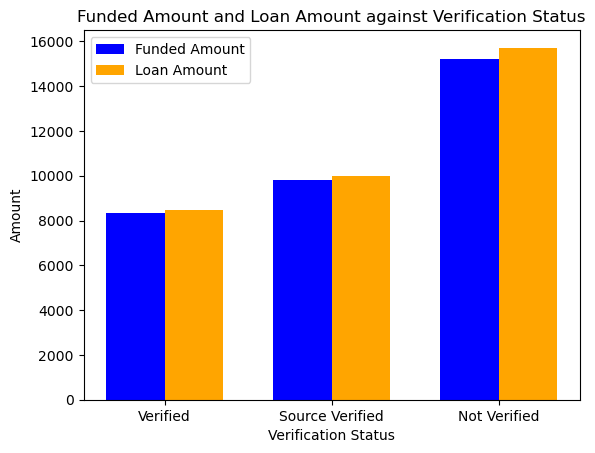

In [88]:
## Lets study the funded amount and loan amount Vs Verification status

# Create bar plots
bar_width = 0.35
verification_statuses = loan01['verification_status'].unique()
indices = range(len(verification_statuses))

# Calculate the mean values
funded_means = loan01.groupby('verification_status')['funded_amnt'].mean()
loan_means = loan01.groupby('verification_status')['loan_amnt'].mean()

# Bar plots
plt.bar(indices, funded_means, bar_width, color='blue', label='Funded Amount')
plt.bar([i + bar_width for i in indices], loan_means, bar_width, color='orange', label='Loan Amount')

# Labeling
plt.xlabel('Verification Status')
plt.ylabel('Amount')
plt.title('Funded Amount and Loan Amount against Verification Status')
plt.xticks([i + bar_width / 2 for i in indices], verification_statuses)
plt.legend()

plt.show()

#### Observations
#### There is no proof that not- verified users were offered lesser loan amount than they requested

#### Analyzing loan amount against loan status and grade


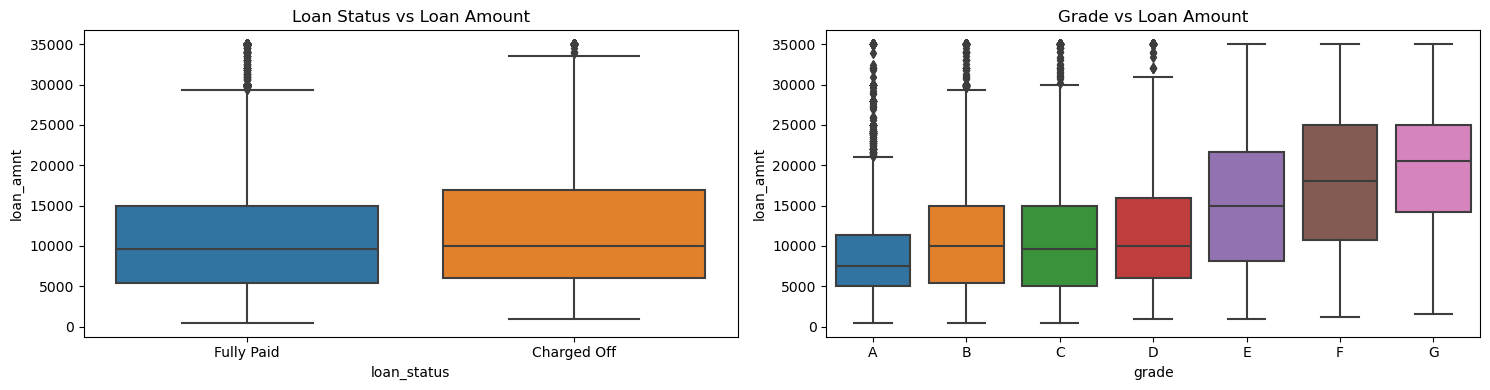

In [90]:
plt.figure(figsize=(15, 4))

# Box plot for Loan status vs Loan amount
plt.subplot(1, 2, 1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan01)
plt.title("Loan Status vs Loan Amount")

# Box plot for Grade vs Loan amount, with grade ordered alphabetically
plt.subplot(1, 2, 2)
grade_order = sorted(loan01["grade"].unique())
sns.boxplot(x="grade", y="loan_amnt", order=grade_order, data=loan01)
plt.title("Grade vs Loan Amount")

plt.tight_layout()
plt.show()

#### Observations
##### 1. In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
##### 2. In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
##### 3. From this we can say that higher the grade more is the risk of default. 

#### Studying relation between loan amount Vs issue date & month

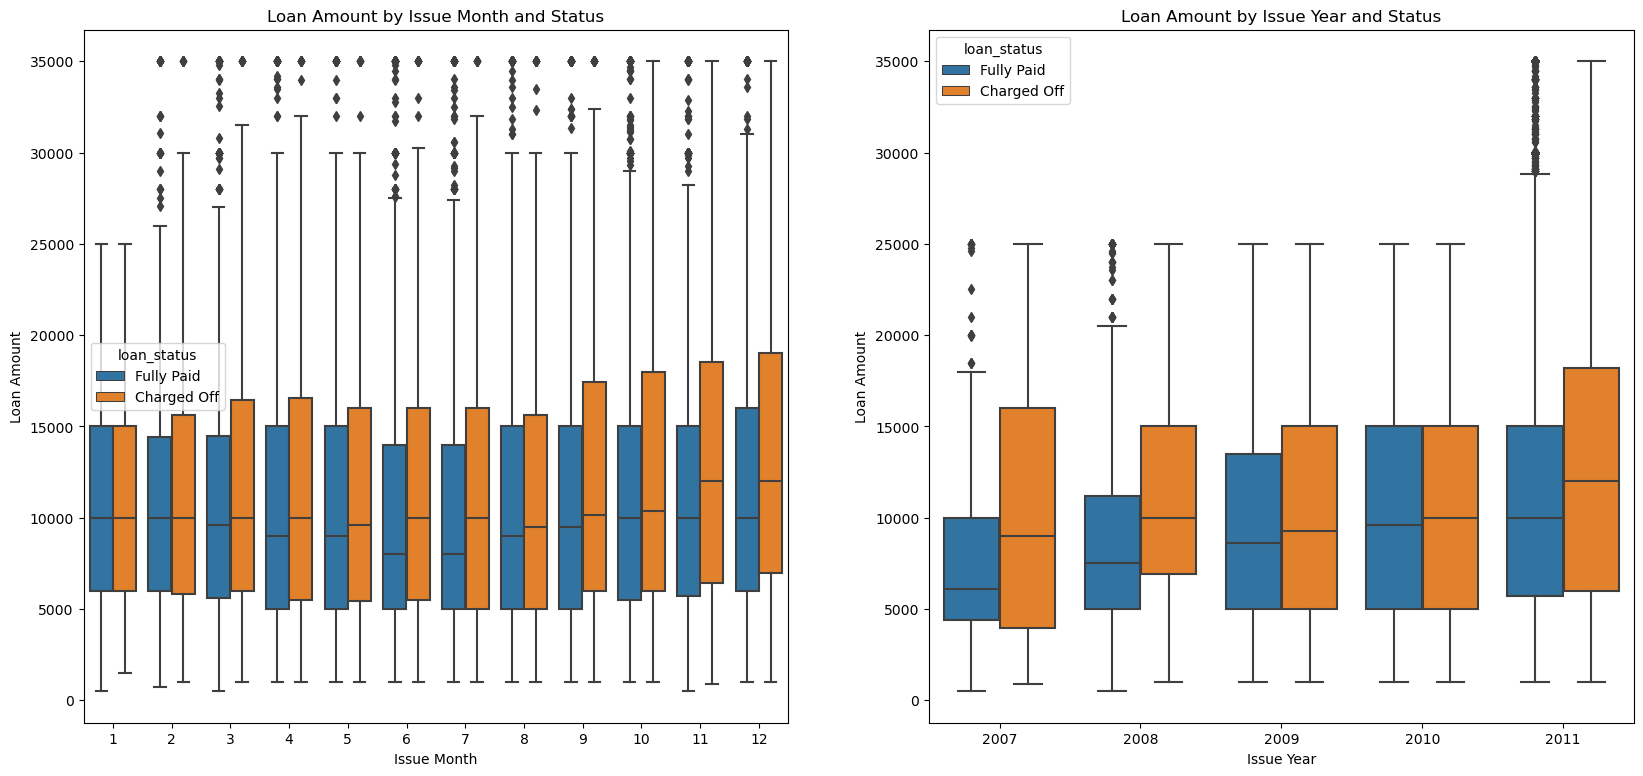

In [92]:
plt.figure(figsize=(20, 9))

# Box plot for monthly data
plt.subplot(121)
sns.boxplot(data=loan01, y='loan_amnt', x='Month', hue='loan_status')
plt.title('Loan Amount by Issue Month and Status')
plt.xlabel('Issue Month')
plt.ylabel('Loan Amount')

# Box plot for yearly data
plt.subplot(122)
sns.boxplot(data=loan01, y='loan_amnt', x='Year', hue='loan_status')
plt.title('Loan Amount by Issue Year and Status')
plt.xlabel('Issue Year')
plt.ylabel('Loan Amount')

plt.show()

#### Observations
##### 1. higher the loam amount, more is the charged off frequency.
##### 2. the borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

### Annual Income and its relation to loan Amount, interest rate and defaults

C:\Users\nehac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


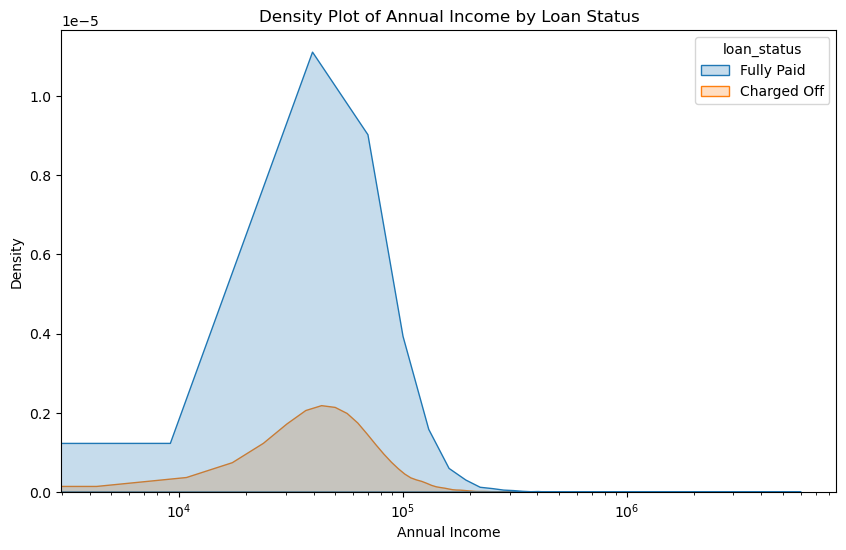

In [94]:
# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=loan01, x='annual_inc', hue='loan_status', fill=True)
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Density Plot of Annual Income by Loan Status')
plt.xscale('log')
plt.show()

#### Observations
#### The higher the annual income, lesser the default chances

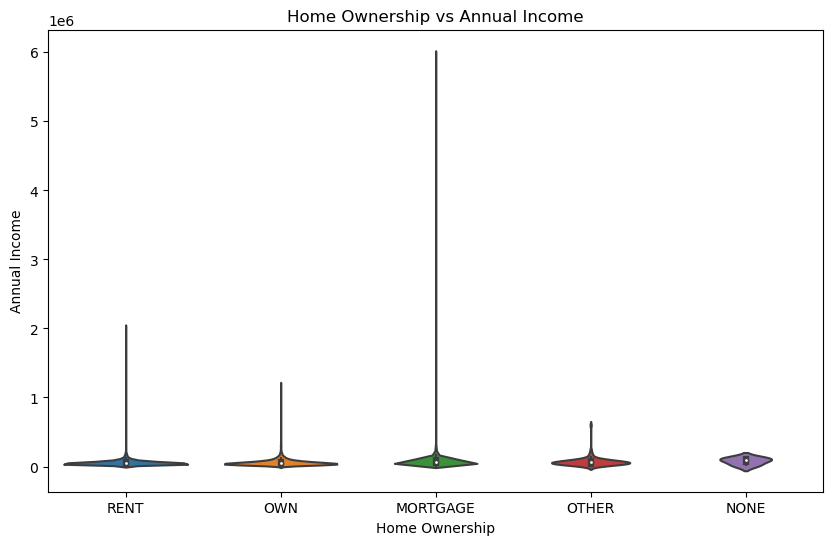

In [96]:
# Home ownership Vs annual income 
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x="home_ownership", y="annual_inc", data=loan01)
plt.title("Home Ownership vs Annual Income")
plt.xlabel("Home Ownership")
plt.ylabel("Annual Income")
plt.show()

#### Observations
#### In Annual Income vs Home Ownership variable we can say that, the borrowers who have the status as Mortgage are having high annual income than others.


### Intrest Rate Vs loan status and grade

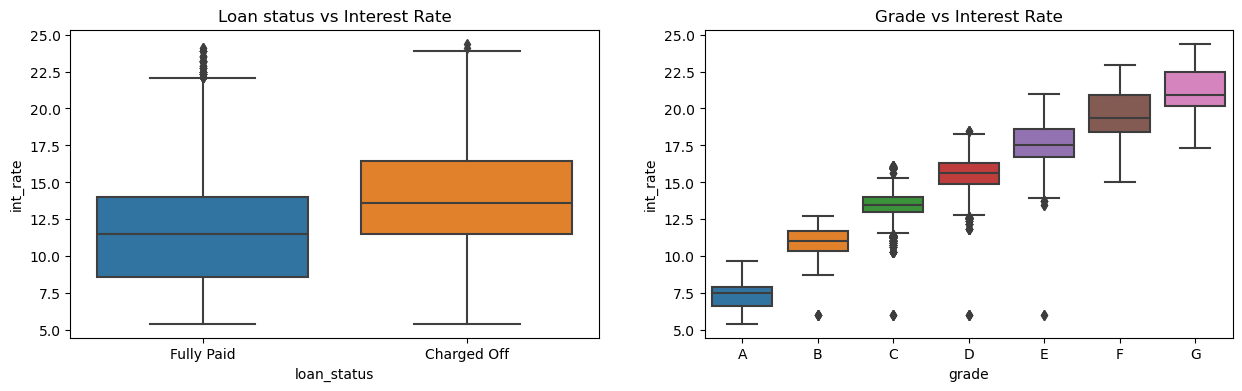

In [98]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=loan01)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan01["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=loan01)
plt.title("Grade vs Interest Rate")
plt.show()

#### Observations
#### 1. In loan status vs interest rate variable we can say that, the borrowers who has high interest rate are mostly defaulters.
#### 2. In grade vs interest rate, as the grade decreases, interest rate is also increasing.

### Interest Rate Vs Purpose

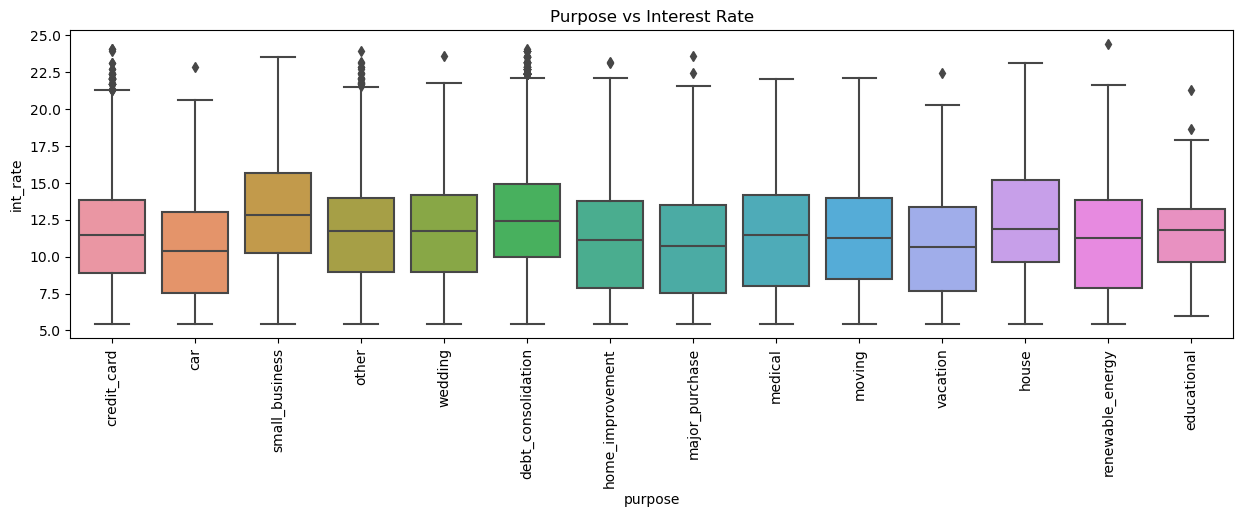

In [117]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=loan01)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

#### Observations
#### debt consolidation and house loan are geeting loan at high interest rate than others.

### revol_util vs Loan Status¶

C:\Users\nehac\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


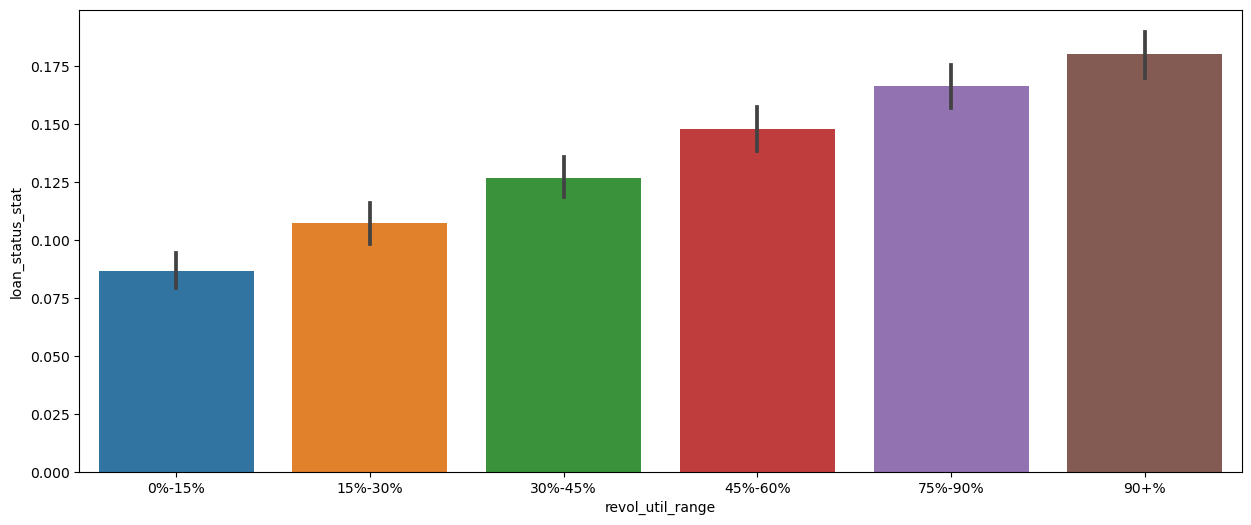

In [100]:
#Revol_util vs Defaulter
loan01['revol_util'] = loan01['revol_util'].str.replace('%','')
loan01['revol_util'] = loan01['revol_util'].astype('float')
bins = [0, 15, 30, 45, 60, 75, 90]
bucket_d = ['0%-15%', '15%-30%', '30%-45%', '45%-60%', '75%-90%', '90+%']
loan01['revol_util_range'] = pd.cut(loan01['revol_util'], bins, labels=bucket_d)

fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='revol_util_range', y='loan_status_stat', data=loan01)
#bank['revol_util'].unique()

#### Observations
#### The defaulters rate is increasing as with revol_util

### pub_rec vs Loan status

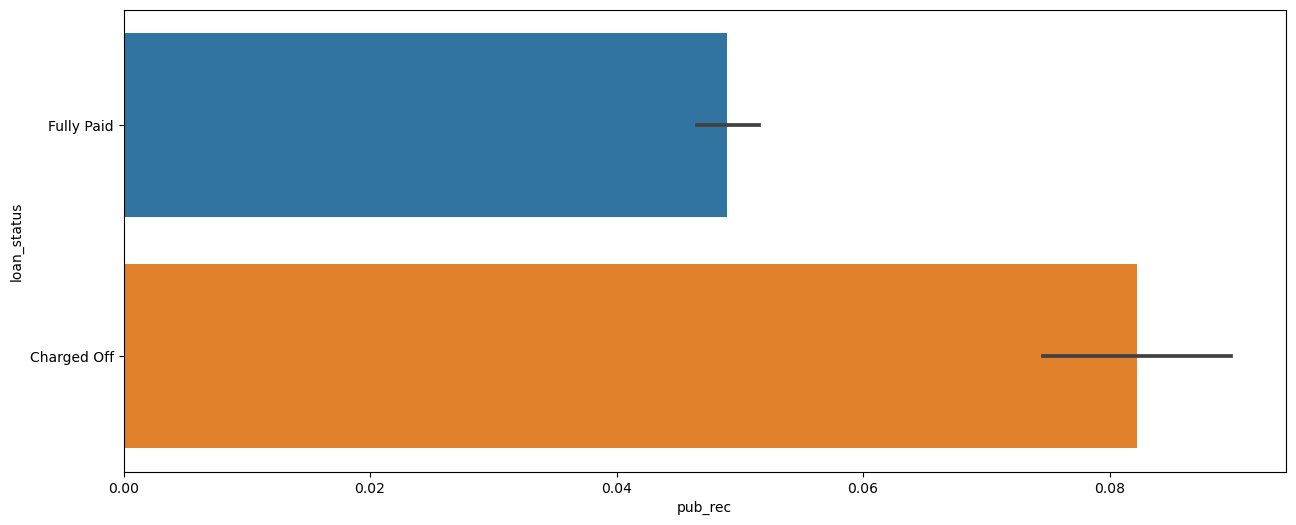

In [102]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x='pub_rec', y='loan_status', data=loan01)

#### Observations
#### It is clear that borrowers who have derogatory public records tend to default on loans

### Annual income Vs Charged Off

In [104]:
#grouping annual income bin and loan status
annual_inc_bin_vs_loan_status = loan01.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#creating "Total" variable
annual_inc_bin_vs_loan_status['Total'] = annual_inc_bin_vs_loan_status['Charged Off'] + annual_inc_bin_vs_loan_status['Fully Paid'] 
#calculating chargedoff proportion
annual_inc_bin_vs_loan_status['Chargedoff_Proportion'] = annual_inc_bin_vs_loan_status['Charged Off'] / annual_inc_bin_vs_loan_status['Total']

C:\Users\nehac\AppData\Local\Temp\ipykernel_9896\2477108364.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_inc_bin_vs_loan_status = loan01.groupby(['annual_inc_range', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()


C:\Users\nehac\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


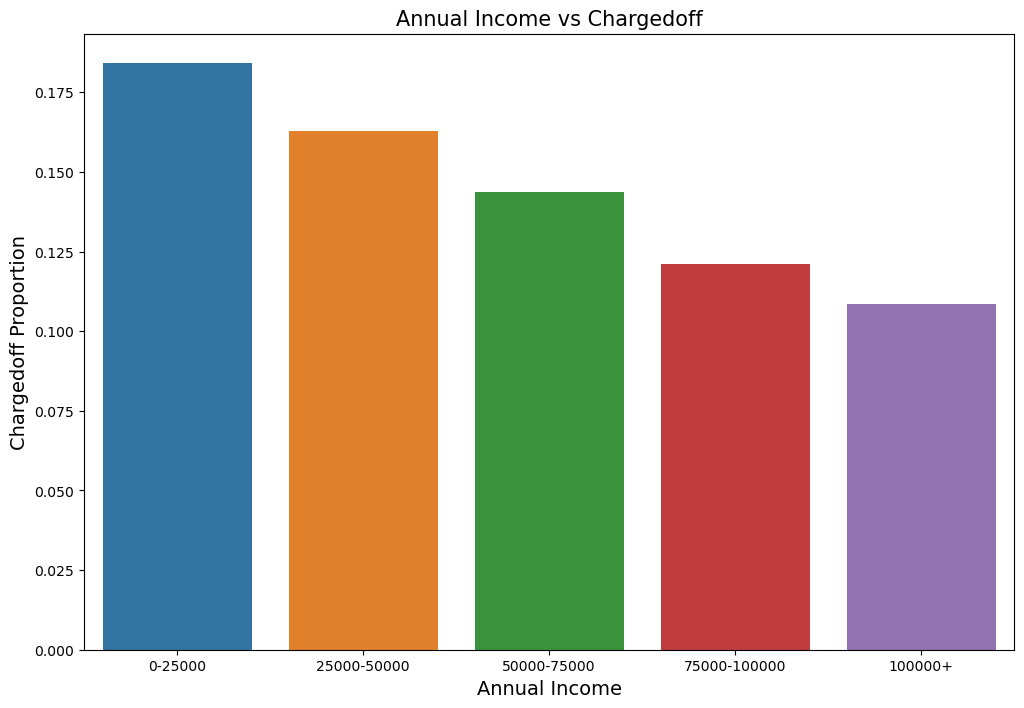

In [106]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Chargedoff',fontsize=15)
#barplot
ax1=sns.barplot(x='annual_inc_range', y='Chargedoff_Proportion', data=annual_inc_bin_vs_loan_status)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

#### Observations
#### From above chart we can say that, as annual income is increasing charged off proportion is decreasing.
#### So highest charged off proportion are in the range 0 to 25k annual income.

### Employment Length Vs Charged Off

In [108]:
emp_length_vs_loan_status = loan01.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan_status['Total'] = emp_length_vs_loan_status['Charged Off'] + emp_length_vs_loan_status['Fully Paid'] 
emp_length_vs_loan_status['Chargedoff_Proportion'] = emp_length_vs_loan_status['Charged Off'] / emp_length_vs_loan_status['Total']
emp_length_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
9,10,1331,7157,8488,0.156810
6,7,263,1448,1711,0.153711
4,5,458,2736,3194,0.143394
0,1,1095,6582,7677,0.142634
5,6,307,1861,2168,0.141605
7,8,203,1232,1435,0.141463
2,3,555,3457,4012,0.138335
3,4,462,2880,3342,0.138241
1,2,567,3724,4291,0.132137
8,9,158,1068,1226,0.128874


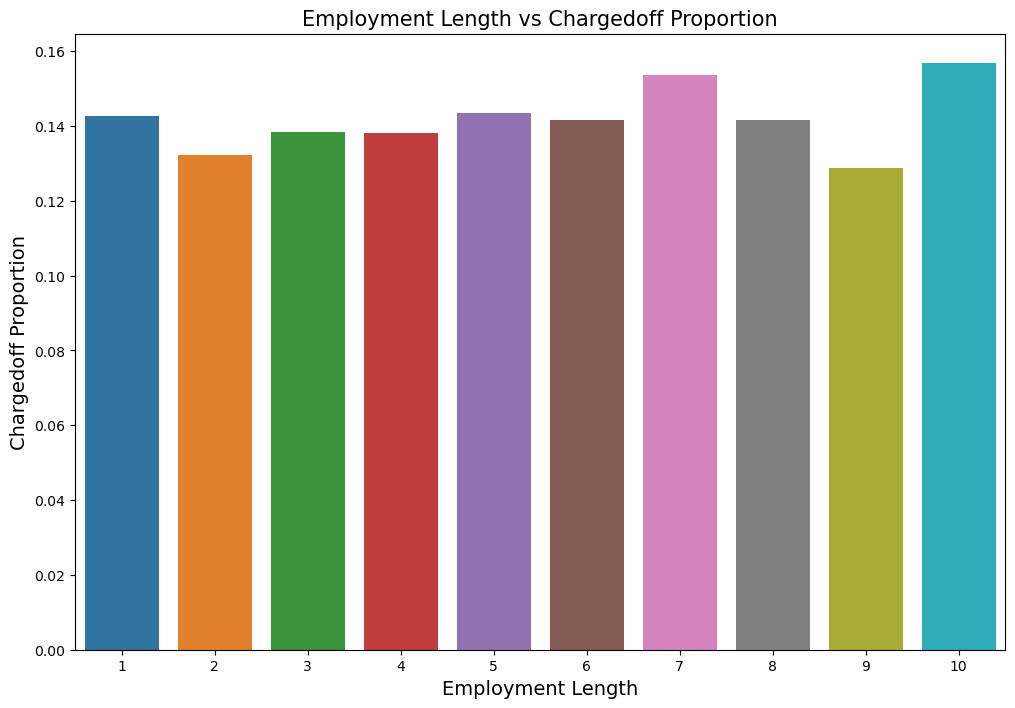

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emp_length_vs_loan_status)
ax1.set_xlabel('Employment Length',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
#### The borrowers whose employee length is less than 1 year, 1 year and 10+ year are mostly getting charged off.

#### Verification status Vs Charged Off 

In [123]:
verification_status_vs_loan_status = loan01.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['Total'] = verification_status_vs_loan_status['Charged Off'] + verification_status_vs_loan_status['Fully Paid'] 
verification_status_vs_loan_status['Chargedoff_Proportion'] = verification_status_vs_loan_status['Charged Off'] / verification_status_vs_loan_status['Total']
verification_status_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,1954,9818,11772,0.165987
1,Source Verified,1396,8098,9494,0.147040
0,Not Verified,2049,14229,16278,0.125875


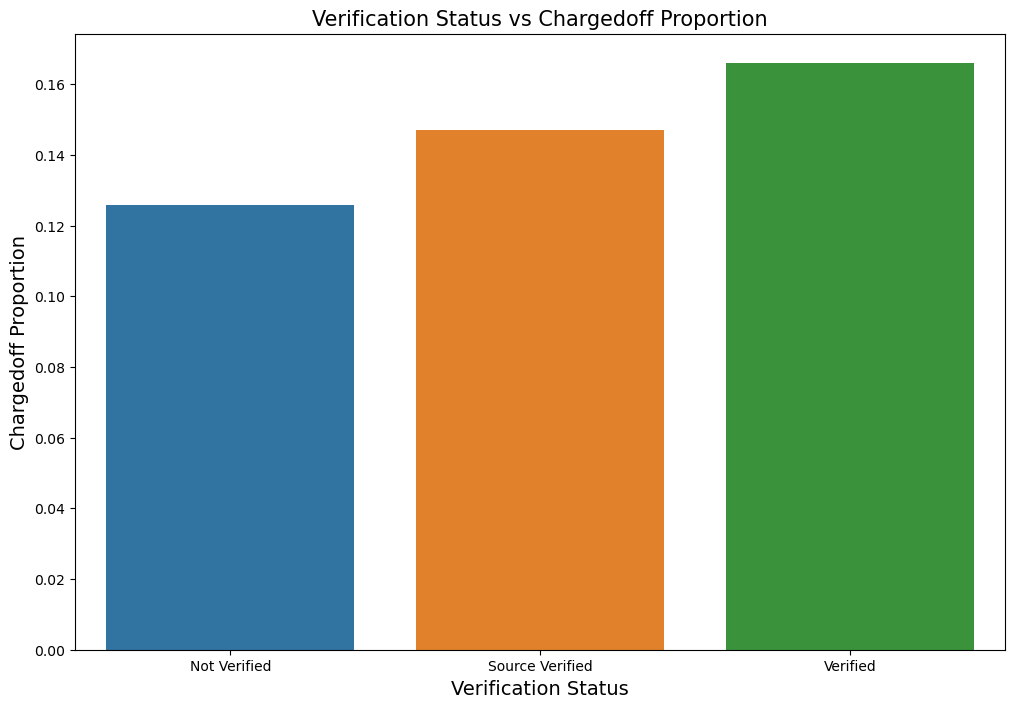

In [125]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan_status)
ax1.set_xlabel('Verification Status',fontsize=14)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14)
plt.show()

#### Observations
#### Most of the verified borrowers are getting charged off then others.

#### Correlation between Grade and Sub Grade

#### Observations
#### Looks like the Grades B, A, C, D have the highest amount of loans and in particular subgrade B3, B5, B4 and B2 constituting the most loan amounts

### Analysing Annual income and int_rate efects on Loan status

C:\Users\nehac\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


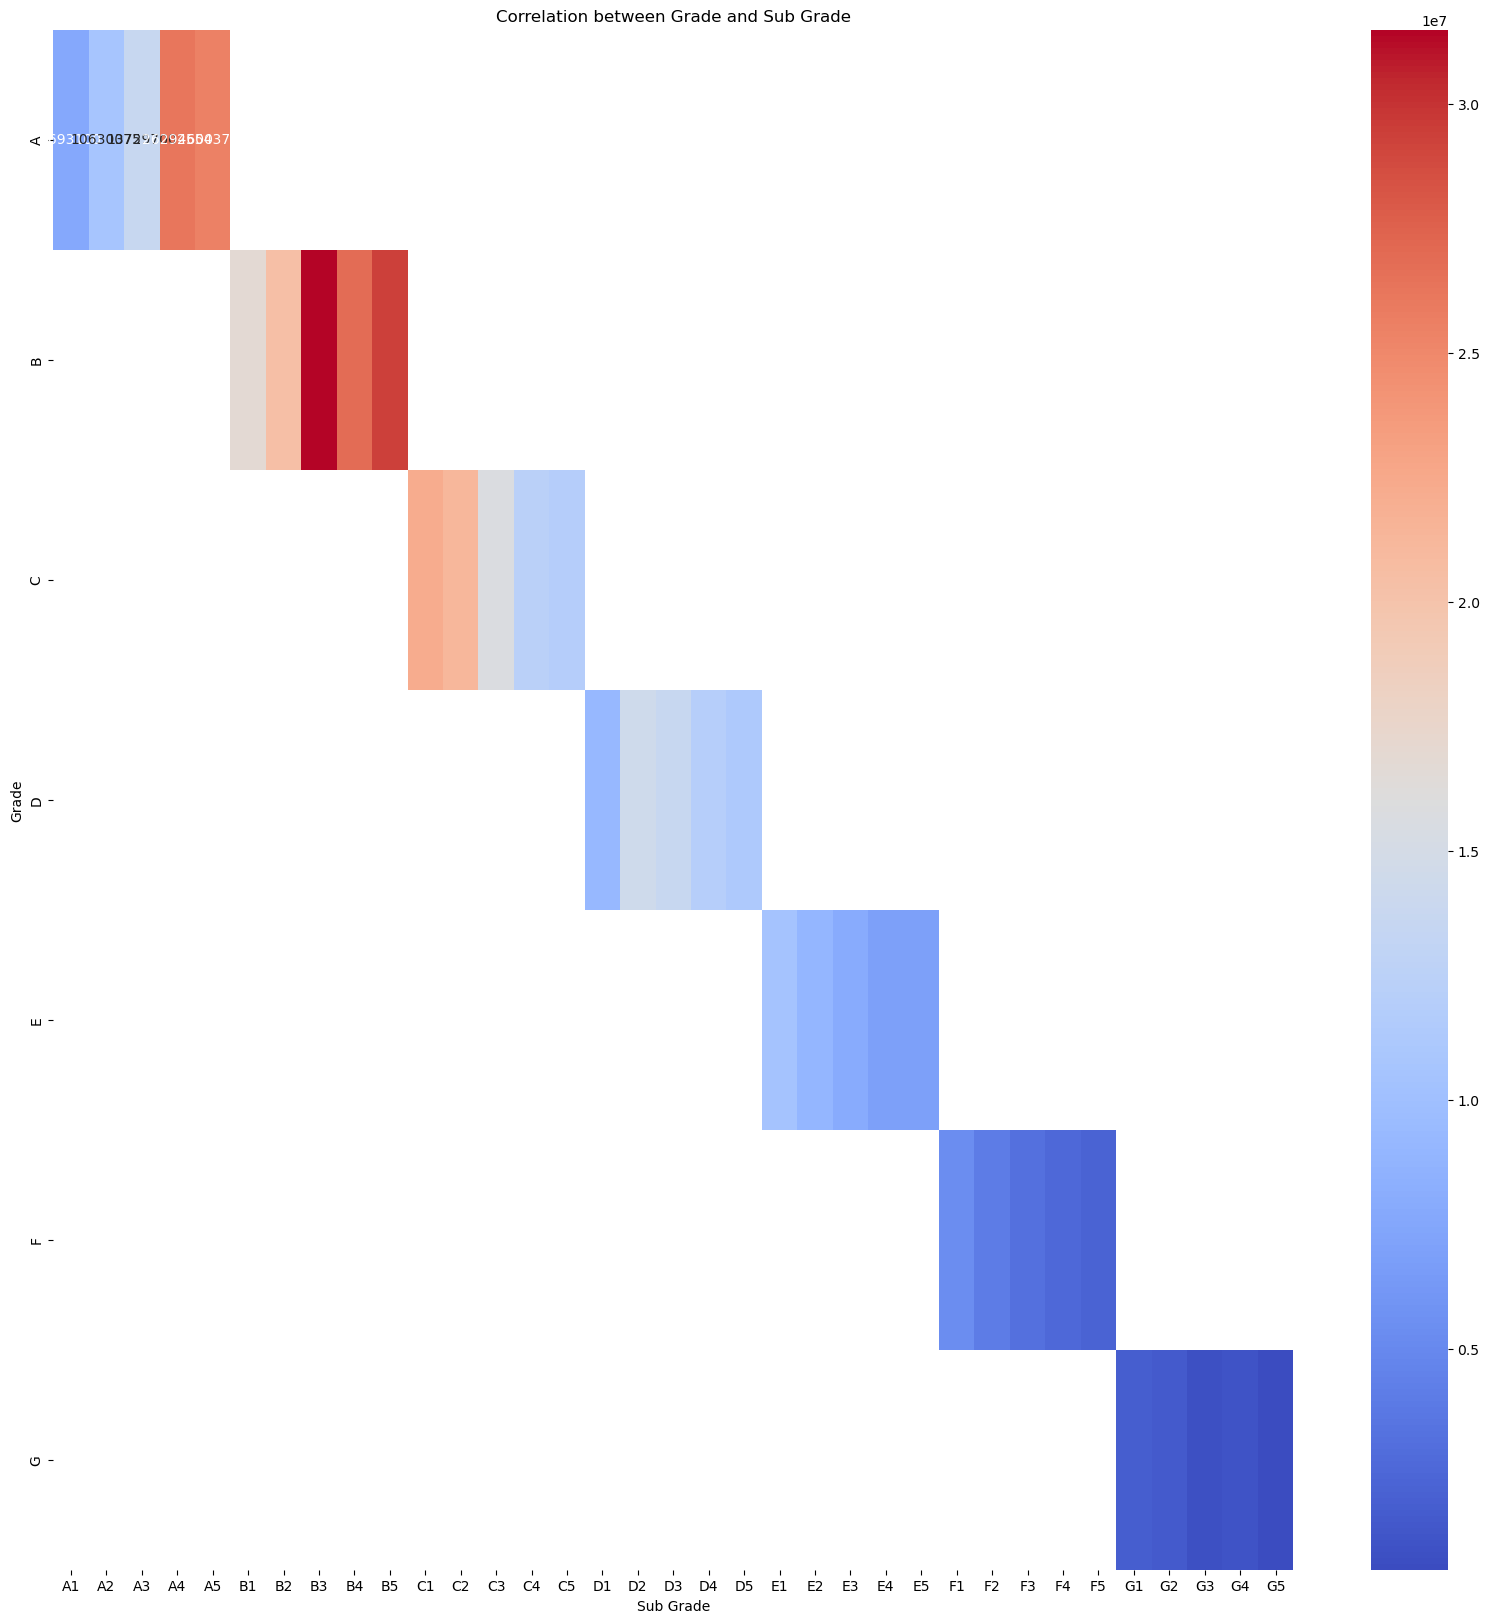

In [143]:
cross_tab = pd.crosstab(loan01['grade'], loan01['sub_grade'], values=loan01.loan_amnt, aggfunc='sum')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='.0f', ax=ax)
plt.xlabel('Sub Grade')
plt.ylabel('Grade')
plt.title('Correlation between Grade and Sub Grade')
plt.show()